# Single Text Analysis
Import the installed modules into IDLE and also import the tokenization and stopwords modules from nltk package. The former is applied to convert the text into tokens and the latter is deployed to remove the stopwords (such as a, an, the, they etc.) in the text.

In [48]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup

We import a html link of the text Rabindranath Tagore's *Mashi And Other Stories* and parse the text from the html

In [49]:
url = "http://www.gutenberg.org/files/34757/34757-h/34757-h.htm" #get the link of a text
get = requests.get(url) #get the url
html = get.text # get the text from the url
text = BeautifulSoup(html, "html.parser").get_text() # parsing the html

The text contains metadata about the author, publisher and Project Gutenberg. We just simply use find function to find the primary text as those details will affect our output. The advangae of Project Gutenberg files is that they have tags of "start of this project..." and "end of this project..."for each file which we can as tags to extract the text between these tags.

In [50]:
extract1 = text.find("*** START OF THIS PROJECT GUTENBERG EBOOK MASHI AND OTHER STORIES ***") #find the index of starting of the text to elminate the metadata

extract2= text.rfind("*** END OF THIS PROJECT GUTENBERG EBOOK MASHI AND OTHER STORIES ***")

analysis_part = text[extract1:extract2]# combining them

Next we extract only words in the sentence by using reguar experssion tokenizer

In [51]:

tokenizer = RegexpTokenizer('\w+') 

tokens = tokenizer.tokenize(analysis_part) # tokenize the text


We convert all the tokens into lower case. Then, we remove the stopwords which will create an impact in our analysis as they appear frequently in the text. The below code also demonstrates how to add new stopwords in the existing stopwords list of nltk. Though there are multiple ways to remove stopwords, I used list data type and append function as they are easy to follow and understand code.  

In [52]:
words = []
for word in tokens:
    words.append(word.lower()) # convert the entire text into lowercase

new_stopwords = ("could", "would", "also", "us") # add few more words to the list of stopwords



stopwords = stopwords.words("english") # calling the stopwords from nltk

for i in new_stopwords:
    stopwords.append(i) # adding new stopwords to the list of existing stopwords

words_list = []

for without_stopwords in words:
    if without_stopwords not in stopwords:
        words_list.append(without_stopwords) # applying stopwords

We use *nltk.FreqDist* function to find the frequent words in the text

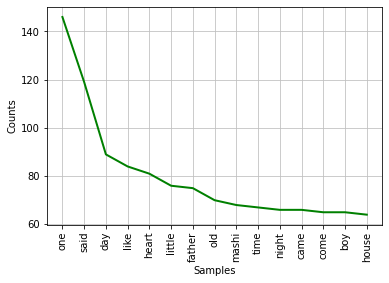

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:

fre_word_list = nltk.FreqDist(words_list) #extracting the frequently appeared words
n= 15 # the top 15 frequent words 
fre_word_list.plot(n, color='green')


# Corpus of text analysis

Now, we can mine the corpus of texts using little more advanced methods of Python.
1.	Install glob using pip and import the module 
2.	Import other necessary modules which we already installed in our previous analysis
3.	Asterisk mark will import all plain text files in the corpus
4.	Create a corpus of text files and call them using glob
5.	Store the stopwords of nltk in a variable
 

In [56]:
import glob
from nltk.corpus import stopwords
corpus = glob.glob("E:\Medium Blog\Text_mining\*.txt")
stop_words = set(stopwords.words('english'))


#### Pre-processing and analysis
We will call the corpus using for loop and then read the texts and convert them into lowercase. We extract the content for analysis, apply stopwords list and tokenization as we did for the single text, but everything should be in the for loop as in the below code.

[('said', 263), ('one', 199), ('day', 130), ('husband', 117), ('came', 114)]


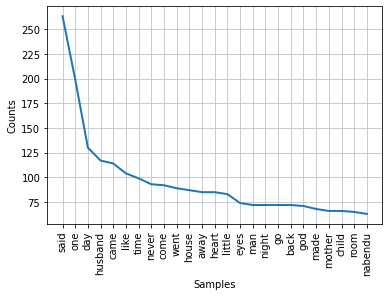

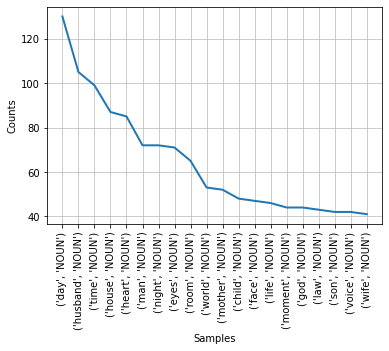

[('one', 147), ('said', 119), ('day', 89), ('like', 84), ('heart', 81)]


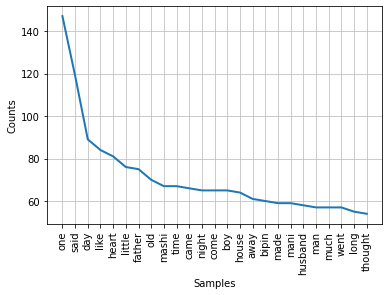

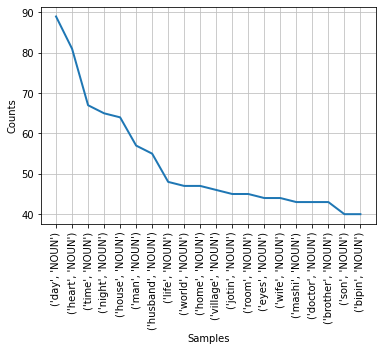

[('one', 213), ('said', 167), ('mother', 151), ('word', 148), ('day', 120)]


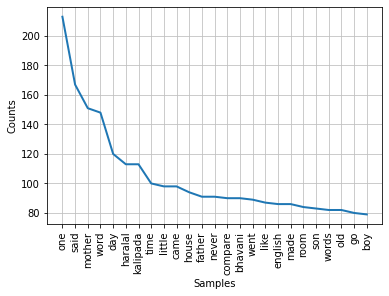

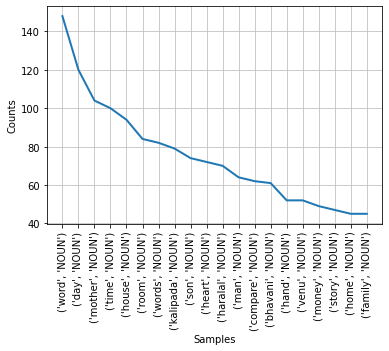

In [55]:
for i in range(len(corpus)):

    text_file = open(corpus[i], "r", encoding = "UTF-8")

    lines = []
    lines = text_file.read().lower()
    
    extract1 =lines.find("start of this project")
    extract2 = lines.rfind("end of this project")
    lines = lines[extract1:extract2]
    
        
    tokenizer = RegexpTokenizer('\w+') # extracting words

    tokens = tokenizer.tokenize(lines) # tokenize the text
    new_stopwords = ("could", "would", "also", "us") # add few more words to the list of stopwords


    stop_words = stopwords.words('english')

    for i in  new_stopwords:
        stop_words.append(i) # adding new stopwords to the list of existing stopwords"""
    

    words_list = [w for w in tokens if not w in stop_words]
    
    filtered_words = []
    for w in tokens:  
        if w not in stop_words:  
            filtered_words.append(w) 


    fre_word_list = nltk.FreqDist(filtered_words) #extracting frequently appeared words
    
    print(fre_word_list.most_common(5)) # check the most common frequent words
    
    fre_word_list.plot(25) #create a plot for the output
    
    
    pos = nltk.pos_tag(filtered_words, tagset = 'universal') # applying parts of speech (pos) tag for further analysis
    
      
    p = []
    y = ['NOUN'] # change the pos here to store them separately 
    for j in pos:
        for l in y:
            if l in j:
                p.append(j)
    
      
    noun = nltk.FreqDist(p) # check the frequency of each pos 
    noun.plot(20) # creating a plot for pos
        